In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import globals
import pandas as pd
import numpy as np
import os
import glob
indices = None

In [16]:
surface_tensions = read_and_write.read_surface_tension_dict()
surface_tensions_big = read_and_write.read_surface_tension_dict(file_path="./Results/Surface_tension_smeared/Surface_tension_smeared_test_big_beta.txt")

# Join the two dictionaries
surface_tensions_combined = surface_tensions.copy()
surface_tensions_combined.update(surface_tensions_big)

In [17]:
keys = list(surface_tensions.keys())
for i,k in enumerate(keys):
    print(k,"index:",i)

beta-10.80-twist-1-60-60-86-6 index: 0
beta-10.80-twist-2-60-60-86-6 index: 1
beta-10.82-twist-1-60-60-86-6 index: 2
beta-10.82-twist-2-60-60-86-6 index: 3
beta-10.85-twist-1-60-60-86-6 index: 4
beta-10.85-twist-2-60-60-86-6 index: 5
beta-11.5-twist-1-60-60-86-6 index: 6
beta-11.5-twist-2-60-60-86-6 index: 7
beta-10.95-twist-1-60-60-86-6 index: 8
beta-10.95-twist-2-60-60-86-6 index: 9
beta-12-twist-1-60-60-86-6 index: 10
beta-12-twist-2-60-60-86-6 index: 11
beta-10.90-twist-1-60-60-86-6 index: 12
beta-10.90-twist-2-60-60-86-6 index: 13


10.80 {'1': {'smearing': ['10', '20', '30', '40', '50', '60'], 'linear': [(0.45423087353333297, 0.03959174033432497), (0.419367207062387, 0.01701886870146317), (0.4306717874050508, 0.011643450617697176), (0.45364426805928837, 0.016041620955324905), (0.4808854624701187, 0.022963537790920082), (0.5083470150638495, 0.02766690483403351)]}, '2': {'smearing': ['10', '20', '30', '40', '50', '60'], 'linear': [(0.5488781969302926, 0.04891843967458585), (0.48550646503037825, 0.06548424597831197), (0.463070345926094, 0.05782595496964944), (0.4676202431051406, 0.05638716429476457), (0.4917893378689139, 0.06231680884010989), (0.5272205490281597, 0.07137193446856097)]}}
[[0.15063657 0.12817183 0.11869742 0.11601216 0.11540736 0.11275448]
 [0.17164801 0.1630651  0.15507587 0.14923014 0.14445688 0.13890998]
 [0.15524955 0.14498734 0.13737993 0.13248211 0.12874117 0.12408739]
 [0.15317275 0.14186825 0.13417884 0.12953272 0.12611675 0.12169763]
 [0.16651479 0.15603205 0.14795352 0.14261806 0.13848411 0.

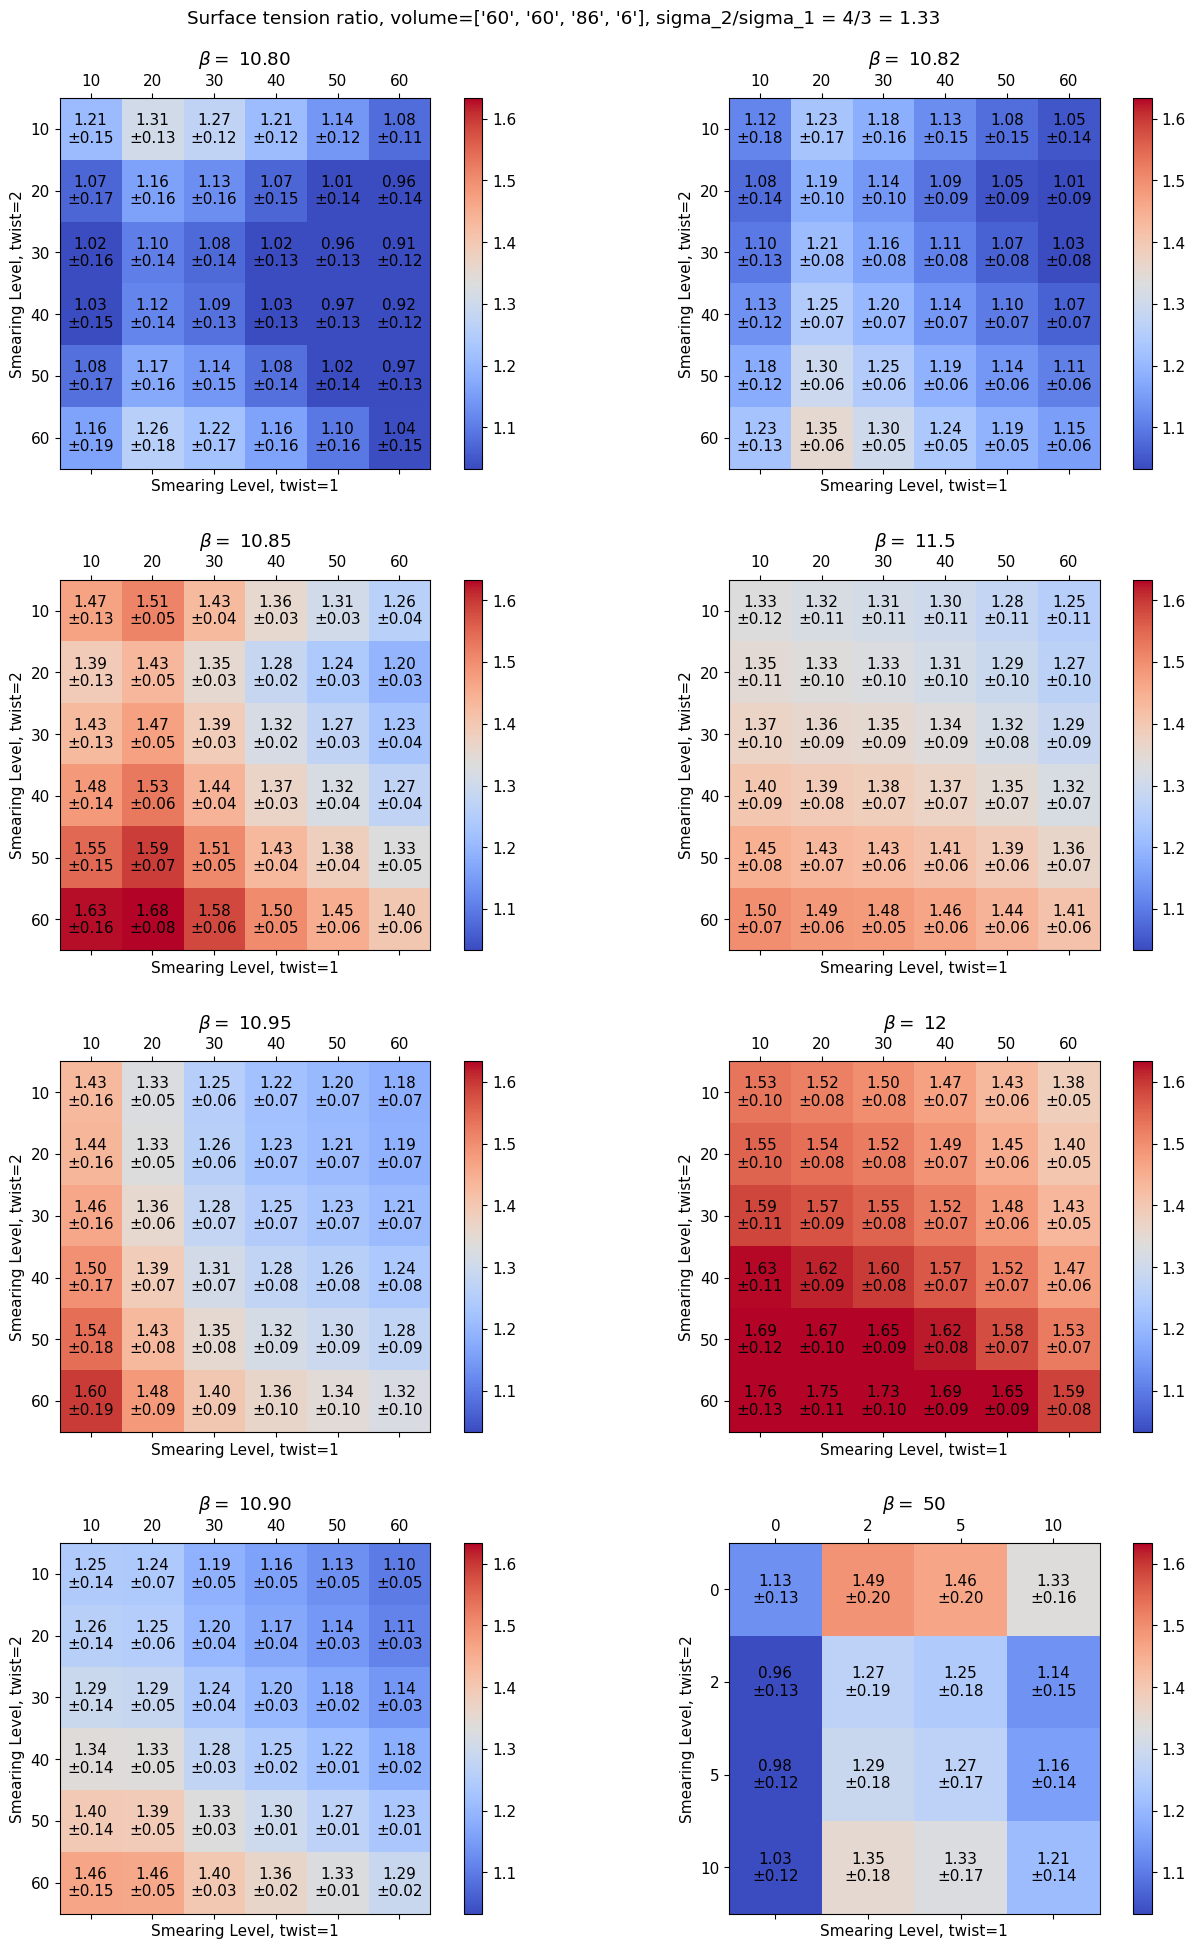

In [4]:
fourier_surface.surface_tension_ratios(surface_tensions_combined,'1','2')


/tmp/ipykernel_887140/1047001921.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = [cm.get_cmap('winter', 100), cm.get_cmap('copper', 100),cm.get_cmap('viridis', 100), cm.get_cmap('plasma', 100)]


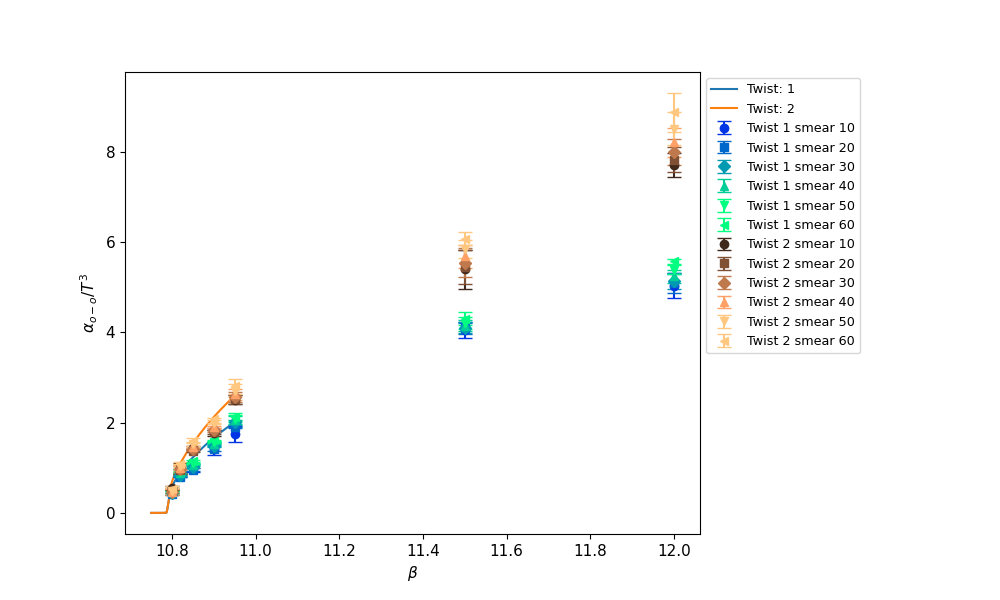

In [19]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib widget

data_4_0 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/44_44_64_10.76-10.95_0_5.txt")
data_4_1 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/44_44_64_10.76-10.95_1_5.txt")
data_4_2 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/44_44_64_10.76-10.95_2_5.txt")
reweight_0 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/32_32_48_10.75-10.85_0_5.txt")
reweight_1 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/32_32_48_10.75-10.85_1_5.txt")
listed = [(data_4_0,data_4_1,(44,44,64,6), 1),(data_4_0,data_4_2,(44,44,64,6),2)]
#listed = [(reweight_0,reweight_1,(32,32,48,6), 1)]
N = 5
x_volume = []
y_volume = []
y_volume_err = []
plt.figure(figsize=(10,6))
for (notwist,twist,dim,twist_coeff) in listed:
    integrated_ys = []
    for (y_notwist,y_twist) in zip(notwist[1],twist[1]):
        x=notwist[0]
        y = y_twist-y_notwist
        y_int = integrate.cumtrapz(y,x,initial=0)
        integrated_ys.append(y_int)
    y_mean = np.mean(integrated_ys,axis=0)
    errors= np.zeros(len(notwist[0]))
    for block in integrated_ys:
        errors += (block - y_mean)**2
    errors = np.sqrt((N-1)/N*errors)
    volume=dim[0]*dim[1]*dim[2]*dim[3]

    plt.plot(x,volume*6*dim[3]**2/(dim[0]*dim[1])*y_mean,label=f"Twist: {twist_coeff}")
    plt.fill_between(x,volume*6*dim[3]**2/(dim[0]*dim[1])*(y_mean-errors),volume*6*dim[3]**2/(dim[0]*dim[1])*(y_mean+errors),alpha=0.4)

colormap = [cm.get_cmap('winter', 100), cm.get_cmap('copper', 100),cm.get_cmap('viridis', 100), cm.get_cmap('plasma', 100)]

surface_tensions_subset = {k: surface_tensions[k] for k in list(surface_tensions.keys())}
twist_legend_added = set()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

for key, values in surface_tensions_subset.items():
    beta_value = float(key.split("-")[1])
    twist = int(key.split("-")[3])
    y_values = [val[0] for val in values['linear']]
    y_errors = [val[1] for val in values['linear']]
    smears = values['smearing']
    
    for i, (smear, y_value, y_error) in enumerate(zip(smears, y_values, y_errors)):
        marker = markers[i % len(markers)]
        color = colormap[int(twist)-1](int(smear)*2)
        if (twist,smear) not in twist_legend_added:
            plt.errorbar(beta_value, y_value, yerr=y_error, fmt=marker, color=color, label=f'Twist {twist} smear {smear}', capsize=5)
            twist_legend_added.add((twist,smear))
        else:
            plt.errorbar(beta_value, y_value, yerr=y_error, fmt=marker, color=color, capsize=5)

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha_{o-o}/T^3$')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.7)
plt.savefig("integral.svg")


In [7]:
plt.close('all')